In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import glob

ravdess_file_list = glob.glob('/Users/ioann/ravdess-speech/*.wav')

In [3]:
ravdess_file_list

['/Users/ioann/ravdess-speech\\03-01-01-01-01-01-01.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-02.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-03.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-04.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-05.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-06.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-07.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-08.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-09.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-10.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-11.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-12.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-13.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-14.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-15.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-16.wav',
 '/Users/ioann/ravdess-speech\\03-01-01-01-01-01-17.wav',
 '/Users/ioann

In [4]:
X, sample_rate = librosa.load('/Users/ioann/ravdess-speech\\03-01-06-02-01-01-01.wav', res_type='kaiser_fast',duration=1,sr=22050)

In [5]:
#εδω είναι από ένα αρχείο η μορφή
sr=22050
mfccs = librosa.feature.mfcc( y=X, sr=sample_rate, n_mfcc=13,hop_length=1012, n_fft=int(sr * 0.05))
mfccs

array([[-6.65397149e+02, -7.51863687e+02, -8.55503538e+02,
        -6.80194567e+02, -6.53478777e+02, -6.60098489e+02,
        -6.28001571e+02, -6.39745341e+02, -7.04948107e+02,
        -8.24454102e+02, -6.69266977e+02, -6.43639681e+02,
        -6.37598231e+02, -6.30708380e+02, -6.47954272e+02,
        -6.77484552e+02, -8.11896983e+02, -6.25108840e+02,
        -4.97348749e+02, -4.63018962e+02, -4.76293421e+02,
        -5.82640321e+02],
       [ 5.99635376e+01,  8.96581641e+01,  8.31008819e+01,
         8.75935868e+01,  8.05722645e+01,  9.99475597e+01,
         8.98210408e+01,  8.47616404e+01,  9.56887032e+01,
         9.49193754e+01,  8.56140127e+01,  8.19804923e+01,
         7.88356923e+01,  7.20169736e+01,  7.56933914e+01,
         9.06953054e+01,  9.47238397e+01,  5.60669864e+01,
         5.45045329e+01,  5.63372338e+01,  5.66413775e+01,
         7.92190126e+01],
       [-3.67907866e+01, -3.04575927e+01, -1.83571525e+00,
        -3.05469252e+01, -3.47550111e+01, -2.78099927e+01,
    

In [6]:
print(mfccs.shape)

(13, 22)


In [7]:
mfccs[1].shape

(22,)

In [8]:
mfccs[:, 21]

array([-582.64032127,   79.21901265,    1.20357316,   62.26108022,
         16.36336228,   36.49173915,   -5.56002415,   18.8968852 ,
        -10.05864034,    2.85750191,   -3.06471361,   13.07609497,
        -20.84319273])

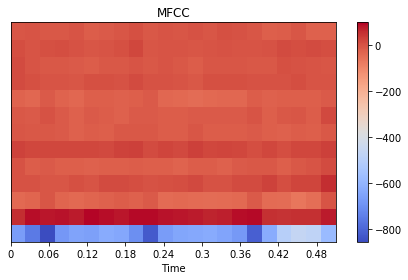

In [9]:
import matplotlib.pyplot as plt
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()